<a href="https://colab.research.google.com/github/GerardoMunoz/Vision/blob/main/GroundingDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRANTES

*   JHONATAN GONZALEZ SALGUERO 20241695009

*  LINA PAOLA GARCIA MALAGÓN  20241695007




In [1]:
from google.colab import files
uploaded = files.upload()  # Esto abrirá un cuadro de diálogo para seleccionar y cargar el archivo

Saving sparse_residential.zip to sparse_residential.zip


In [2]:
import zipfile
with zipfile.ZipFile('sparse_residential.zip', 'r') as zip_ref:
    zip_ref.extractall('ruta/destino')  # Aquí puedes especificar la carpeta donde extraer los archivos

In [3]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!unzip sparse_residential.zip

Archive:  sparse_residential.zip
   creating: sparse_residential/
  inflating: sparse_residential/sparse_residential_001.jpg  
  inflating: sparse_residential/sparse_residential_002.jpg  
  inflating: sparse_residential/sparse_residential_003.jpg  
  inflating: sparse_residential/sparse_residential_004.jpg  
  inflating: sparse_residential/sparse_residential_005.jpg  
  inflating: sparse_residential/sparse_residential_006.jpg  
  inflating: sparse_residential/sparse_residential_007.jpg  
  inflating: sparse_residential/sparse_residential_008.jpg  
  inflating: sparse_residential/sparse_residential_009.jpg  
  inflating: sparse_residential/sparse_residential_010.jpg  
  inflating: sparse_residential/sparse_residential_011.jpg  
  inflating: sparse_residential/sparse_residential_012.jpg  
  inflating: sparse_residential/sparse_residential_013.jpg  
  inflating: sparse_residential/sparse_residential_014.jpg  
  inflating: sparse_residential/sparse_residential_015.jpg  
  inflating: sparse

In [11]:
!pwd

/content


In [13]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.


In [14]:
%cd GroundingDINO/

/content/GroundingDINO


In [15]:
!pip install -q -e .

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 21.1 MB/s eta 0:00:00


In [16]:
!pip install supervision

In [18]:
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

/content
mkdir: cannot create directory ‘weights’: File exists


In [19]:
!pwd

/content


In [21]:
!dir

GroundingDINO  ruta  sample_data  sparse_residential  sparse_residential.zip  weights


* Entorno de ejecución -> Reiniciar sesión
* Entorno de ejecución -> Ejecutar celda y las de abajo

In [22]:
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git

  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-d1edoy9r
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-d1edoy9r
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 856dde20aee659246248e20734ef9ba5214f5e44
  Preparing metadata (setup.py) ... done
  Created wheel for groundingdino: filename=groundingdino-0.1.0-cp310-cp310-linux_x86_64.whl size=3045825 sha256=4cdaf9a9e12649c468a5dd1b54cae0af748b321adf72043287241362f17bb1fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-pzr1onid/wheels/6b/06/d7/b57f601a4df56af41d262a5b1b496359b13c323bf5ef0434b2
Successfully built groundingdino
  Attempting uninstall: groundingdino
    Found existing installation: groundingdino 0.1.0
    Uninstalling groundingdino-0.1.0:
      Successfully uninstalled groundingdino-0.1.0


In [23]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [24]:
# Crear carpetas para el procesamiento
dataset_path = "/sparse_residential"  # Cambia al directorio de tus imágenes
output_images_path = "images"
output_detection_path = "detection"
output_segmentation_path = "segmentation"

os.makedirs(output_images_path, exist_ok=True)
os.makedirs(output_detection_path, exist_ok=True)
os.makedirs(output_segmentation_path, exist_ok=True)

# SOLO PARA UNA IMAGEN

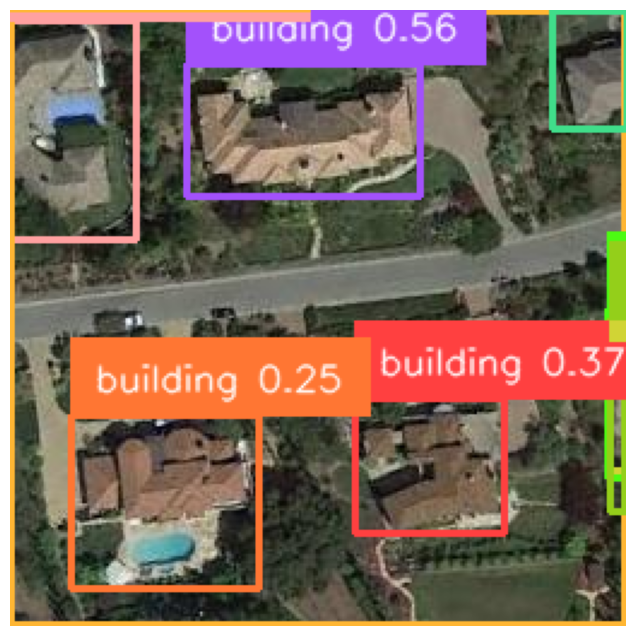

In [27]:
import os
import supervision as sv

# Parámetros ajustados para detectar más objetos
image_path = "/content/sparse_residential/sparse_residential_010.jpg"
text = "Building"  #
BOX_THRESHOLD = 0.22  # Reducido para captar más cajas
TEXT_TRHESHOLD = 0.10  # Reducido para captar más texto

# Cargar la imagen
image_source, image = load_image(image_path)

# Realizar predicción
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=text,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_TRHESHOLD,
    device='cuda'
)

# Anotar la imagen
annotated_frame = annotate(
    image_source=image_source,
    boxes=boxes,
    logits=logits,
    phrases=phrases
)

# Mostrar la imagen anotada con un tamaño más pequeño
sv.plot_image(annotated_frame, (8, 8))  # Cambiado a 8x8 para visualizar mejor imágenes pequeñas

In [38]:
# Guardar etiquetas en formato YOLO
yolo_labels = []
h, w, _ = image_source.shape

for box, phrase in zip(boxes, phrases):
    x_min, y_min, x_max, y_max = box
    x_center = ((x_min + x_max) / 2) / w
    y_center = ((y_min + y_max) / 2) / h
    width = (x_max - x_min) / w
    height = (y_max - y_min) / h
    yolo_labels.append(f"0 {x_center} {y_center} {width} {height}")  # Clase 0 para 'Building'

# Define image_file using image_path
image_file = os.path.basename(image_path) # Extract filename from image_path
output_detection_path = "."  # Define output path, for example current directory

# Ruta del archivo de salida
label_file_path = os.path.join(output_detection_path, f"{os.path.splitext(image_file)[0]}.txt")

# Escribir las etiquetas en el archivo
with open(label_file_path, "w") as f:
    f.write("\n".join(yolo_labels))

print(f"Etiquetas YOLO guardadas en: {label_file_path}")

Etiquetas YOLO guardadas en: ./sparse_residential_010.txt


In [ ]:
pip install segment-anything opencv-python matplotlib torch torchvision

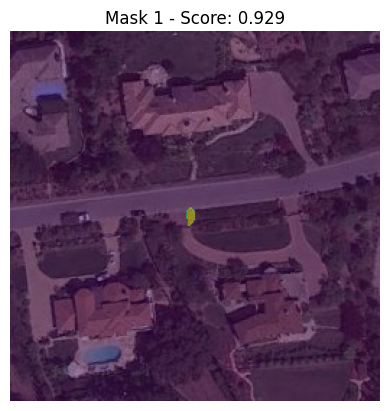

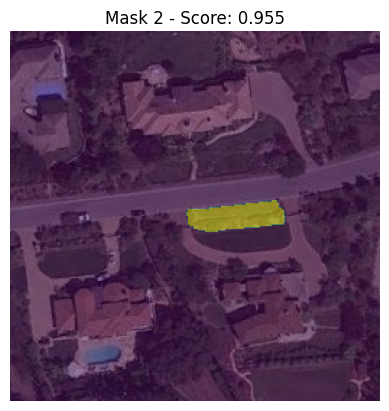

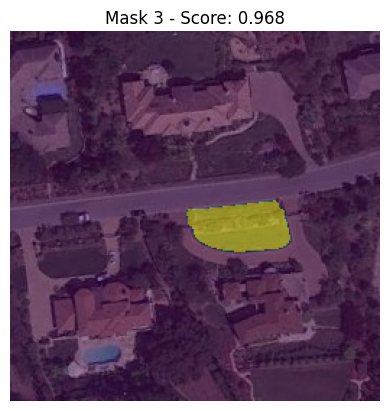

In [ ]:
import torch
from segment_anything import sam_model_registry, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Descargar el modelo si no existe
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
if not os.path.exists(sam_checkpoint):
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O {sam_checkpoint}

# Registrar y cargar el modelo
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

# Inicializar el predictor
predictor = SamPredictor(sam)

# Cargar la imagen
image_path = "/sparse_residential/sparse_residential_010.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

# Seleccionar un punto para segmentar
input_point = np.array([[image.shape[1] // 2, image.shape[0] // 2]])  # Coordenada central
input_label = np.array([1])  # Etiqueta positiva para segmentar

# Generar máscaras
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,  # Genera múltiples máscaras
)

# Visualizar resultados
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)  # Superponer la máscara con transparencia
    plt.title(f"Mask {i+1} - Score: {scores[i]:.3f}")
    plt.axis("off")
    plt.show()


In [44]:
# Download the checkpoint file if it doesn't exist
checkpoint_path = 'weights/sam_vit_h.pth'
if not os.path.exists(checkpoint_path):
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O {checkpoint_path}
    print(f"Checkpoint file downloaded to: {checkpoint_path}")
else:
    print(f"Checkpoint file already exists at: {checkpoint_path}")

--2024-11-21 02:51:29--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.59, 13.227.219.10, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘weights/sam_vit_h.pth’

weights/sam_vit_h.p 100%[===================>]   2.39G  25.5MB/s    in 56s     

2024-11-21 02:52:25 (43.6 MB/s) - ‘weights/sam_vit_h.pth’ saved [2564550879/2564550879]

Checkpoint file downloaded to: weights/sam_vit_h.pth


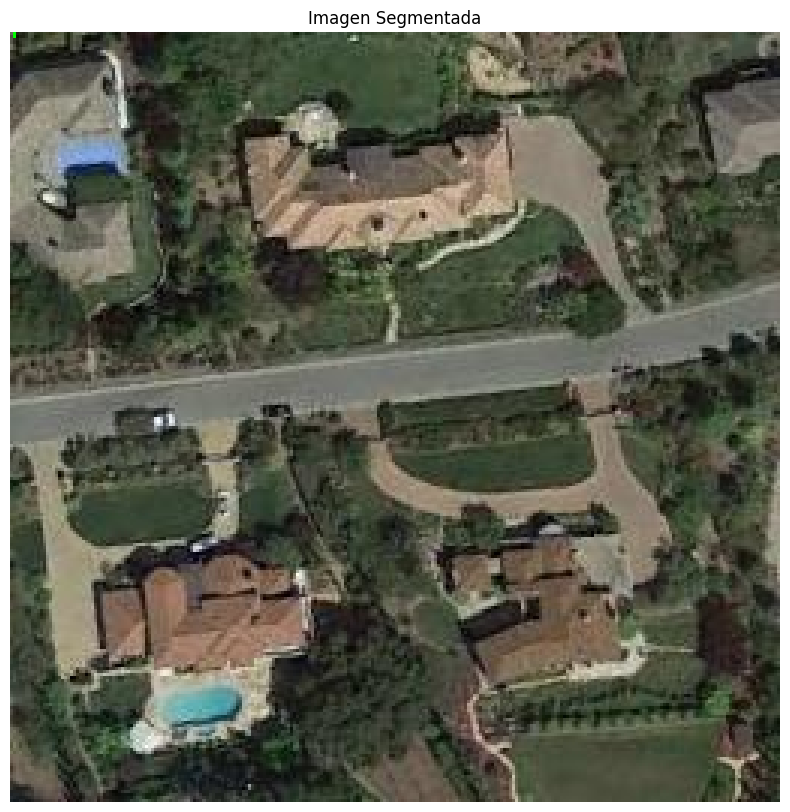

Imagen segmentada guardada en: segmentation/sparse_residential_010.jpg


In [46]:
import os
import cv2
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt  # Para mostrar la imagen en pantalla

# Configuración de SAM
sam_checkpoint = "weights/sam_vit_h.pth"  # Ruta al modelo SAM
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device="cuda")
sam_predictor = SamPredictor(sam)

# Definir carpeta de salida para segmentación
output_segmentation_path = "segmentation"
os.makedirs(output_segmentation_path, exist_ok=True)

# Cargar la imagen
image_source = cv2.imread(image_path)  # Ruta de la imagen
h, w, _ = image_source.shape

# Cargar las etiquetas YOLO (asume que están generadas y disponibles)
label_file_path = os.path.join(output_detection_path, f"{os.path.splitext(os.path.basename(image_path))[0]}.txt")
boxes = []

# Leer las etiquetas YOLO y convertirlas a coordenadas de píxeles
with open(label_file_path, "r") as f:
    for line in f.readlines():
        class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
        x_min = int((x_center - box_width / 2) * w)
        y_min = int((y_center - box_height / 2) * h)
        x_max = int((x_center + box_width / 2) * w)
        y_max = int((y_center + box_height / 2) * h)
        boxes.append([x_min, y_min, x_max, y_max])

# Configurar SAM con la imagen original
sam_predictor.set_image(image_source)

# Transformar las cajas YOLO para que SAM las entienda
transformed_boxes = sam_predictor.transform.apply_boxes_torch(
    torch.tensor(boxes, dtype=torch.float, device="cuda"), image_source.shape[:2]
)

# Generar máscaras basadas en las cajas
masks, _, _ = sam_predictor.predict_torch(
    point_coords=None,  # No necesitamos puntos
    point_labels=None,
    boxes=transformed_boxes,  # Usamos las cajas YOLO como entrada
    multimask_output=False
)

# Dibujar las máscaras en la imagen original
segmentation_image = image_source.copy()
for mask in masks:
    segmentation_image[mask[0].cpu().numpy()] = [0, 255, 0]  # Pinta las máscaras de verde

# Guardar la imagen segmentada
segmentation_image_path = os.path.join(output_segmentation_path, os.path.basename(image_path))
cv2.imwrite(segmentation_image_path, segmentation_image)

# Mostrar la imagen segmentada en pantalla
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para matplotlib
plt.axis("off")
plt.title("Imagen Segmentada")
plt.show()

print(f"Imagen segmentada guardada en: {segmentation_image_path}")
